# Ecommerce Project- Linear Regression

Hypothetical Ecommerce company based in New York City that sells clothing online, but also has in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

The Ecommerce Customers csv file has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [29]:
customers = pd.read_csv("Ecommerce Customers")

In [30]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [31]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [32]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

In [33]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

**Analyzing Time Spent on Website vs. Yearly Amount Spent**

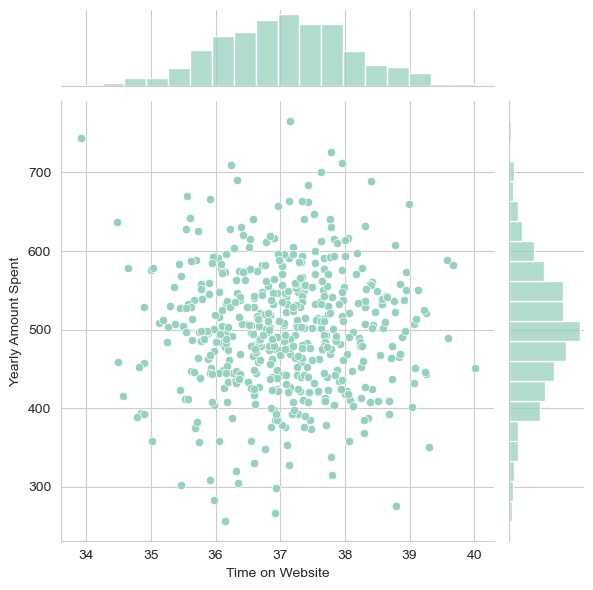

In [27]:
sns.jointplot(x='Time on Website', y= 'Yearly Amount Spent', data=customers)

**Analyzing Time on App vs. Yearly Amount Spent**

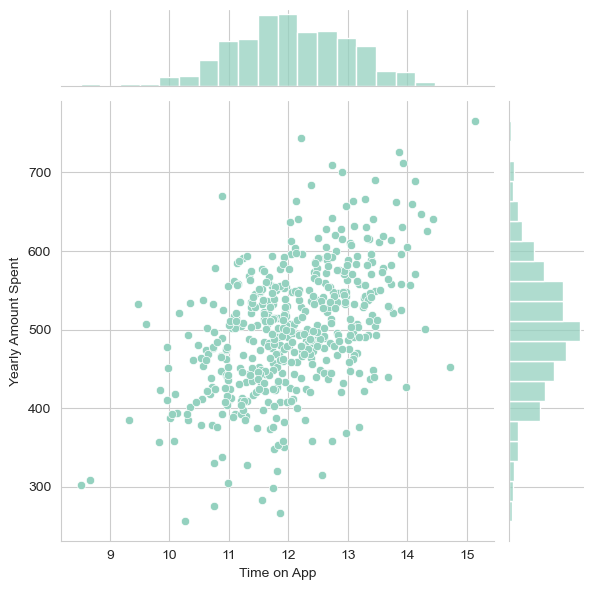

In [9]:
sns.jointplot(x='Time on App', y= 'Yearly Amount Spent', data=customers)

**Analyzing Time on App vs. Length of Membership.**

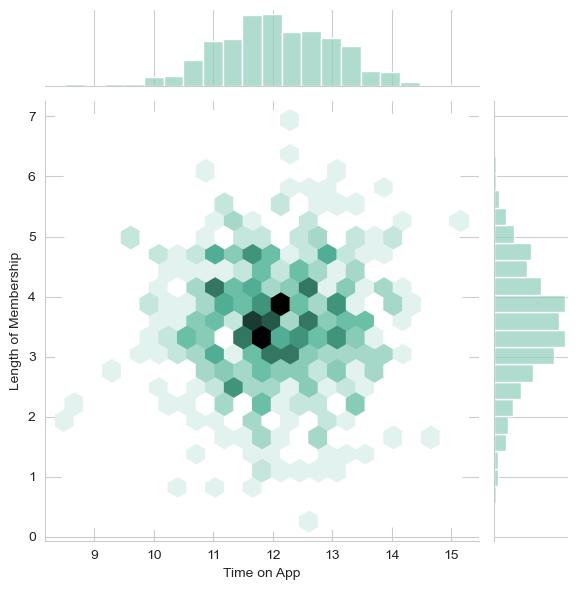

In [10]:
sns.jointplot(x='Time on App', y= 'Length of Membership', data=customers, kind='hex')

**Exploring relationships across the entire data set**

C:\Users\tpbra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\tpbra\AppData\Local\Temp\ipykernel_26396\1799471451.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


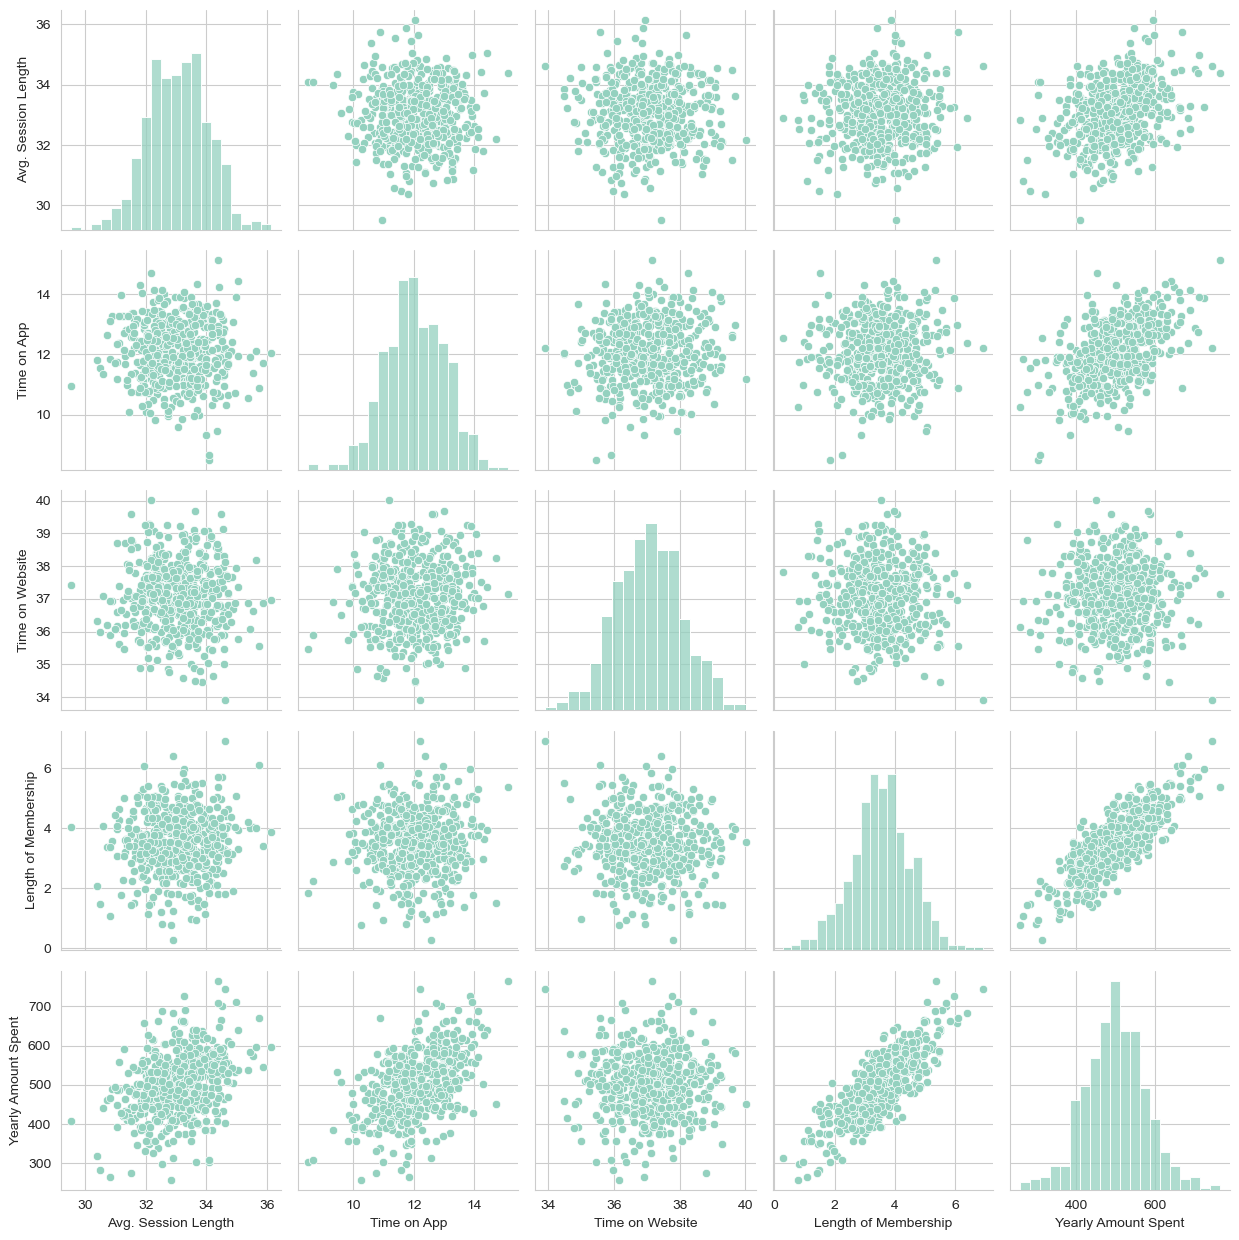

In [11]:
sns.pairplot(customers)
plt.tight_layout()

Based off this plot, **Length of Memership** seems to be the most correlated feature with Yearly Amount Spent.

**Length of Membership Visualizations**

C:\Users\tpbra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


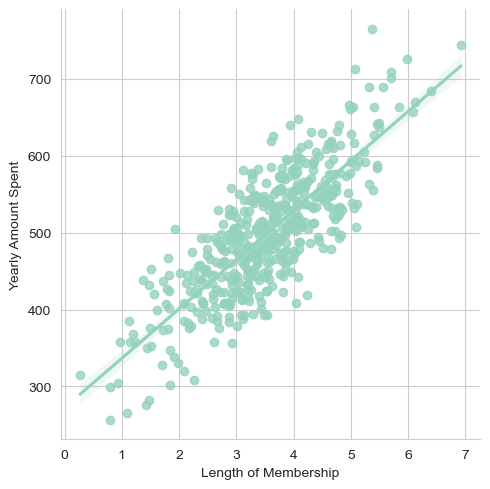

In [42]:
sns.lmplot(x='Length of Membership', y= 'Yearly Amount Spent', data = customers)

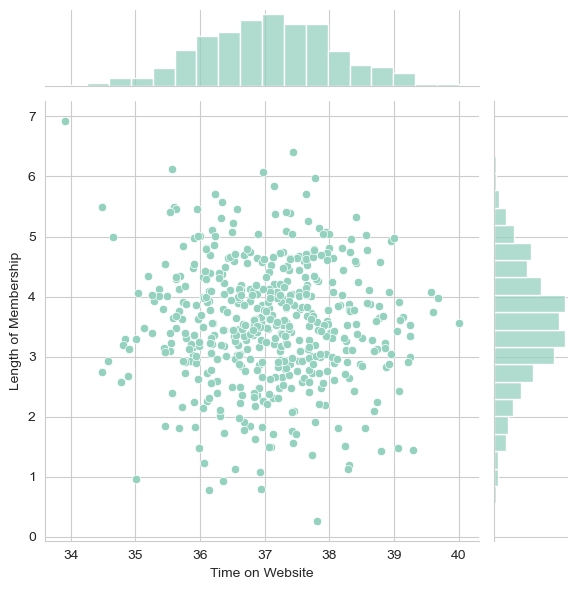

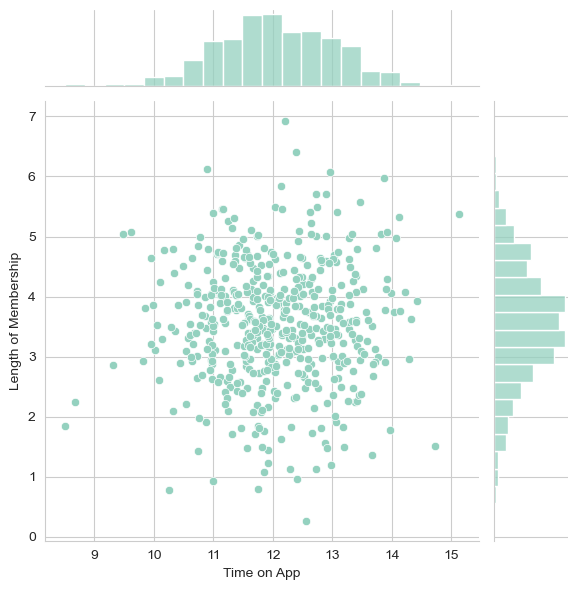

In [44]:
sns.jointplot(x='Time on Website', y= 'Length of Membership', data=customers)

sns.jointplot(x='Time on App', y= 'Length of Membership', data=customers)

## Training and Testing Data

In [14]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [15]:
Y = customers['Yearly Amount Spent']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

## Training the Model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(x_train, y_train)

LinearRegression()

**Coefficients of the model**

In [21]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data

In [22]:
predictions = lm.predict(x_test)

**Scatterplot of the real test values vs. predicted values**

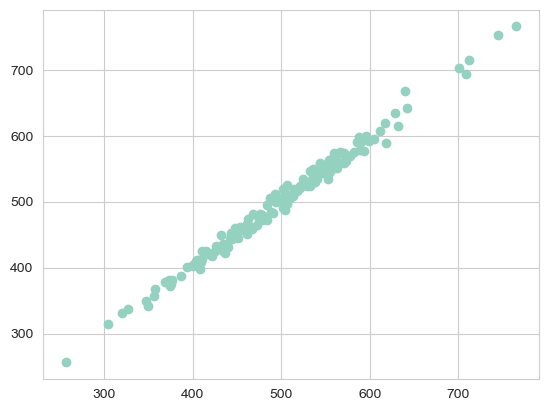

In [23]:
plt.scatter(y_test, predictions)

## Evaluating the Model

In [41]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(metrics.explained_variance_score(y_test, predictions))

MAE: 7.228148653430813
MSE: 79.81305165097416
RMSE: 8.933815066978617
0.9890771231889607


In [38]:
metrics.explained_variance_score(y_test, predictions)

0.9890771231889607

## Residuals

**Exploring the residuals to make sure it looks normally distributed**

C:\Users\tpbra\AppData\Local\Temp\ipykernel_26396\2747667862.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions), bins = 50)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

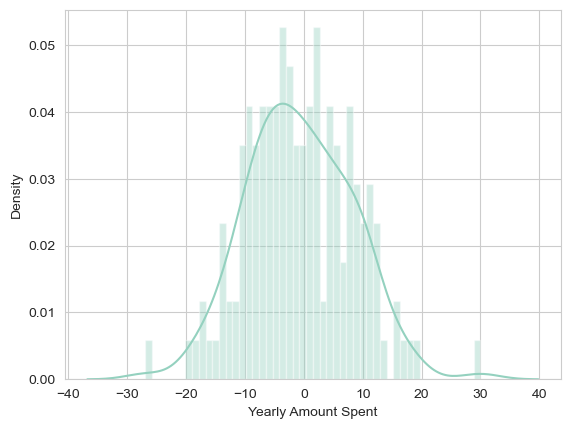

In [25]:
sns.distplot((y_test-predictions), bins = 50)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development?

In [26]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
